<a href="https://colab.research.google.com/github/CellsToCode/python-tutorials/blob/main/how_to/make_pivot_tables_in_pandas/01_Final_Pivot_tables_in_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating Pivot Tables with Python & Pandas
---

Notebook used on cellstocode.com & on the Cells to Code Youtube channel

## **Excel:**

*   Created on Ribbon -> Insert

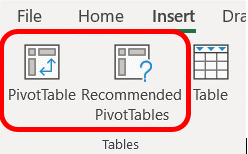

## **Python:**



*   Uses pd.pivot_table()
*   Assumes dataframe


    pd.pivot_table(df
               , index='Rows'              # Rows box in Excel
               , columns='Columns'         # Columns Box in Excel
               , values='Values'           # Values box in Excel (choose variable to aggregate)
               , aggfunc='sum')           # Value Field Settings window in Excel (default is mean)


OR

    df.pivot_table()



<br>

### Load required packages and data

In [ ]:
# Import required packages ()
import numpy as np
import pandas as pd
from vega_datasets import data

In [ ]:
# Import data
cars = data.cars()

<br>

### Excel Demo: Use `cars` dataframe to build simple pivot table in Excel
---

In [ ]:
# Preview cars dataframe
cars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


<br>

In [ ]:
# Create pivot table with Cylinders on rows (index)
cars.pivot_table(index='Cylinders', values='Miles_per_Gallon', aggfunc='sem')

,Miles_per_Gallon
Cylinders,
3,1.282251
4,0.399791
5,4.750556
6,0.415413
8,0.279467


<br>

In [ ]:
# Create pivot table with Cylinders on columns
cars.pivot_table(columns='Cylinders', values='Miles_per_Gallon')

Cylinders,3,4,5,6,8
Miles_per_Gallon,20.55,29.286765,27.366667,19.985714,14.963107


<br>

In [ ]:
# Create pivot table which returns averages for variables broken out by Origin (columns) and Cylinders (index)
cars.pivot_table(index='Cylinders', columns='Origin', values='Miles_per_Gallon')

Origin,Europe,Japan,USA
Cylinders,,,
3,NaN,20.550000,NaN
4,28.411111,31.595652,27.840278
5,27.366667,NaN,NaN
6,20.100000,23.883333,19.663514
8,NaN,NaN,14.963107


<br>

In [ ]:
# Create pivot table which counts the number of cars created by Origin (columns) and Cylinders (index)
cars.pivot_table(index='Cylinders', columns='Origin', values='Name', aggfunc='count')

Origin,Europe,Japan,USA
Cylinders,,,
3,NaN,4.0,NaN
4,66.0,69.0,72.0
5,3.0,NaN,NaN
6,4.0,6.0,74.0
8,NaN,NaN,108.0


<br>

In [ ]:
# Create pivot table which counts the number of cars created by Origin and Cylinders (include fill_value, margins, margins_name) - save to a df called cars_pivot
cars_pivot = cars.pivot_table(index='Cylinders'
                , columns='Origin'
                , values='Name'
                , aggfunc='count'
                , fill_value=0
                , margins=True
                , margins_name='Grand Total')

In [ ]:
cars_pivot

Origin,Europe,Japan,USA,Grand Total
Cylinders,,,,
3,0,4,0,4
4,66,69,72,207
5,3,0,0,3
6,4,6,74,84
8,0,0,108,108
Grand Total,73,79,254,406


<br>

<br><br>

## Exporting the Results

In [ ]:
# Output the final result
cars_pivot.to_excel('my_fancy_pivot_table.xlsx')

<br><br>

## Using multiple arguments

In [ ]:
# Create pivot table which returns the total and average miles per gallon by Origin and Cylinders
cars.pivot_table(index='Cylinders'
                , columns='Origin'
                , values='Miles_per_Gallon'
                , aggfunc=['sum', 'mean']
                , fill_value=0
                , margins=True
                , margins_name='Grand Total')

sum                                   mean             \
Origin       Europe   Japan     USA Grand Total     Europe      Japan   
Cylinders                                                               
3               0.0    82.2     0.0        82.2   0.000000  20.550000   
4            1789.9  2180.1  2004.5      5974.5  28.411111  31.595652   
5              82.1     0.0     0.0        82.1  27.366667   0.000000   
6              80.4   143.3  1455.1      1678.8  20.100000  23.883333   
8               0.0     0.0  1541.2      1541.2   0.000000   0.000000   
Grand Total  1952.4  2405.6  5000.8      9358.8  27.891429  30.450633   

                                    
Origin             USA Grand Total  
Cylinders                           
3             0.000000   20.550000  
4            27.840278   29.286765  
5             0.000000   27.366667  
6            19.663514   19.985714  
8            14.963107   14.963107  
Grand Total  20.083534   23.514573

In [ ]:
cars.pivot_table(index='Name'
                , values=['Miles_per_Gallon', 'Acceleration']
                , aggfunc=['mean']
                , fill_value=0
                , margins=True
                , margins_name='Grand Total')

mean                 
                        Acceleration Miles_per_Gallon
Name                                                 
amc ambassador brougham     11.00000        13.000000
amc ambassador dpl           8.50000        15.000000
amc ambassador sst          11.50000        17.000000
amc concord                 18.65000        21.850000
amc concord d/l             15.10000        18.100000
...                              ...              ...
vw pickup                   24.60000        44.000000
vw rabbit                   14.45000        35.250000
vw rabbit c (diesel)        21.70000        44.300000
vw rabbit custom            14.00000        31.900000
Grand Total                 15.56809        23.514573

[312 rows x 2 columns]